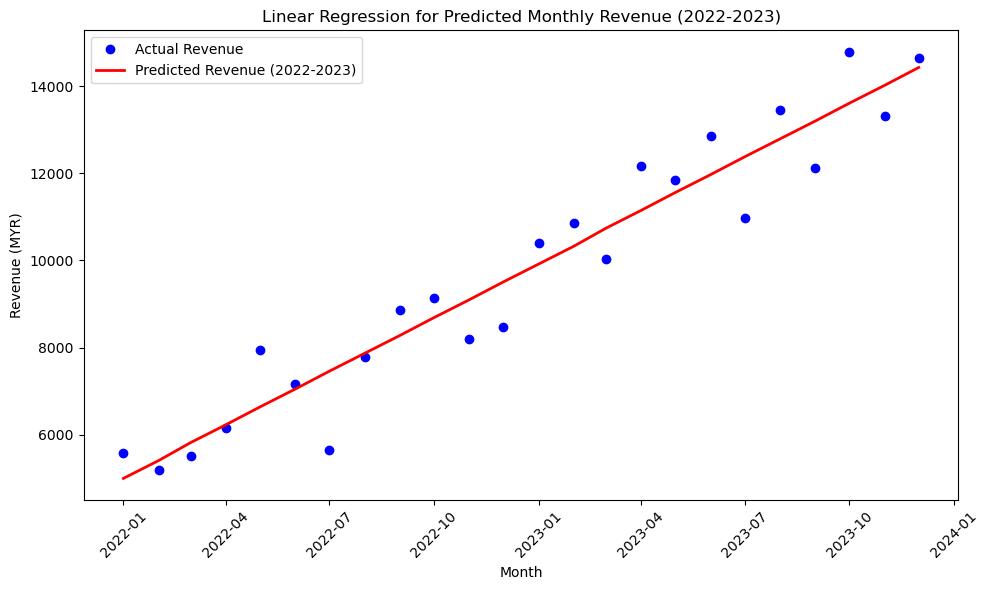

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Mock data setup since actual data file is unavailable
def generate_synthetic_data():
    dates = pd.date_range(start="2022-01-01", end="2023-12-31", freq="ME")
    revenue_values = np.linspace(5000, 15000, len(dates)) + np.random.normal(0, 1000, len(dates))  # Simulate increasing trend
    categories = ["Home & Living"] * len(dates)
    return pd.DataFrame({"DateTime": dates, "Product Category": categories, "Revenue (MYR)": revenue_values})

# Load and preprocess the synthetic data
def load_and_preprocess_shopee_data():
    data = generate_synthetic_data()
    data_cleaned = data[data['Product Category'] == 'Home & Living'].copy()

    data_cleaned['DateTime'] = pd.to_datetime(data_cleaned['DateTime'], errors='coerce')
    data_cleaned['MonthYear'] = data_cleaned['DateTime'].dt.to_period('M')
    
    # Group by 'MonthYear' and calculate total monthly revenue
    grouped_data = data_cleaned.groupby('MonthYear')['Revenue (MYR)'].sum().reset_index()
    grouped_data['MonthYear'] = grouped_data['MonthYear'].dt.to_timestamp()  # Convert Period to Timestamp

    return grouped_data

# Load and preprocess the data
grouped_data = load_and_preprocess_shopee_data()

# Check if data is loaded successfully
if not grouped_data.empty:
    # Prepare the full dataset for 2022 and 2023 for modeling
    grouped_data['MonthNumber'] = np.arange(len(grouped_data))  # Numeric month sequence for modeling
    X_full = grouped_data[['MonthNumber']]
    y_full = grouped_data['Revenue (MYR)']

    # Train a linear regression model on the full dataset
    model = LinearRegression()
    model.fit(X_full, y_full)

    # Generate predictions for the entire period (2022 and 2023)
    predictions_full = model.predict(X_full)

    # Plot the continuous line for predicted revenue from 2022 to 2023
    plt.figure(figsize=(10, 6))
    
    # Actual revenue data (2022 and 2023) as dots
    plt.plot(grouped_data['MonthYear'], y_full, 'o', label='Actual Revenue', color='blue')
    
    # Continuous predicted revenue line (2022-2023)
    plt.plot(grouped_data['MonthYear'], predictions_full, label='Predicted Revenue (2022-2023)', color='red', linewidth=2)

    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Revenue (MYR)')
    plt.title('Linear Regression for Predicted Monthly Revenue (2022-2023)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available to build the prediction model.")
